In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
2+2

4

In [4]:
import numpy as np

In [5]:
import keras

Using TensorFlow backend.


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [7]:
data = pd.read_csv('Z:/Deep Learning/diplomes.csv', encoding="latin1", dtype=object)

In [8]:
data.head()

,NAIM,NAIA,HT,CSE,DDIPL,ANNEE,SEXE,SALMEE,ACTEU,HHC,EMPNBH,DATANT,DAMOIS,SALMET,PRIM,REVENT,PRIMS,RGA
0,09,1939,39,67,7,1993,1,854,1,39,.,1986,01,NaN,NaN,NaN,NaN,NaN
1,08,1951,04,56,7,1993,2,34,1,04,.,1989,03,NaN,NaN,NaN,NaN,NaN
2,03,1975,NaN,NaN,6,1993,2,.,3,NaN,.,.,NaN,NaN,NaN,NaN,NaN,NaN
3,07,1914,NaN,NaN,7,1993,1,.,3,NaN,.,.,NaN,NaN,NaN,NaN,NaN,NaN
4,02,1917,NaN,NaN,7,1993,2,.,3,NaN,.,.,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
len(data.iloc[:,0])

3836097

In [10]:
len(data.iloc[0,:])

18

In [11]:
data.loc[0,"ANNEE"]

'1993'

In [12]:
data.loc[0,"SALMEE"]

'854'

In [13]:
data.columns

Index(['NAIM', 'NAIA', 'HT', 'CSE', 'DDIPL', 'ANNEE', 'SEXE', 'SALMEE',
       'ACTEU', 'HHC', 'EMPNBH', 'DATANT', 'DAMOIS', 'SALMET', 'PRIM',
       'REVENT', 'PRIMS', 'RGA'],
      dtype='object')

In [14]:
des = data.describe()

In [15]:
des["CSE"]

count     1865500
unique         38
top            52
freq       162953
Name: CSE, dtype: object

In [16]:
des["HHC"]

count     1613967
unique        111
top            39
freq       321099
Name: HHC, dtype: object

In [17]:
data["HHC"].unique()

array(['39', '04', nan, '60', '45', '03', '12', '40', '36', '37', '38',
       '31', '30', '50', '35', 'SP', '20', '55', '72', '32', '42', '10',
       '70', '18', '91', '41', '99', '44', '24', '48', '08', '25', '27',
       '16', '15', '28', '19', '51', '26', '29', '05', '06', '65', '57',
       '43', '23', '21', '14', '49', '46', '53', '63', '02', '56', '54',
       '33', '47', '90', '22', '80', '09', '00', '66', '13', '34', '52',
       '58', '85', '11', '75', '17', '67', '07', '77', '78', '68', '83',
       '92', '94', '59', '01', '84', '69', '64', '61', '98', '86', '88',
       '96', '62', '97', '76', '73', '74', '79', '82', '71', '95', '81',
       '93', '89', '87', '8', '4', '7', '9', '1', '3', '2', '6', '5', '0'], dtype=object)

In [18]:
data.loc[data["HHC"]=="SP","HHC"]=np.nan

In [19]:
data["HHC"].unique()

array(['39', '04', nan, '60', '45', '03', '12', '40', '36', '37', '38',
       '31', '30', '50', '35', '20', '55', '72', '32', '42', '10', '70',
       '18', '91', '41', '99', '44', '24', '48', '08', '25', '27', '16',
       '15', '28', '19', '51', '26', '29', '05', '06', '65', '57', '43',
       '23', '21', '14', '49', '46', '53', '63', '02', '56', '54', '33',
       '47', '90', '22', '80', '09', '00', '66', '13', '34', '52', '58',
       '85', '11', '75', '17', '67', '07', '77', '78', '68', '83', '92',
       '94', '59', '01', '84', '69', '64', '61', '98', '86', '88', '96',
       '62', '97', '76', '73', '74', '79', '82', '71', '95', '81', '93',
       '89', '87', '8', '4', '7', '9', '1', '3', '2', '6', '5', '0'], dtype=object)

In [20]:
des["NAIM"]

count     3835006
unique         14
top            05
freq       337942
Name: NAIM, dtype: object

In [21]:
des["SALMEE"]

count     2216460
unique       6390
top             .
freq       932074
Name: SALMEE, dtype: object

In [22]:
data.loc[data["SALMEE"]==".","SALMEE"] = np.nan

In [23]:
# On enlève les valeurs utilisées pour coder les refus et ne sait pas"
data.loc[data["SALMEE"]=="9999999","SALMEE"] = np.nan
data.loc[data["SALMEE"]=="9999998","SALMEE"] = np.nan
# Ainsi des valeurs qui semblent correspondre à des erreurs des enquêteurs voulant coder le refus"
data.loc[data["SALMEE"]=="999999","SALMEE"] = np.nan
data.loc[data["SALMEE"]=="99999","SALMEE"] = np.nan
# Ainsi que les valeurs correspondant à 999 999 francs, ancienne valeur maximale de la variable, 
#souvent renseignée pour une raison mystérieuse...
data.loc[data["SALMEE"]=="152449","SALMEE"] = np.nan


In [24]:
des["DDIPL"]

count     3351333
unique          6
top             7
freq      1169025
Name: DDIPL, dtype: object

In [25]:
des["NAIA"]

count     3836079
unique        140
top          1964
freq        60920
Name: NAIA, dtype: object

In [26]:
des["NAIM"]

count     3835006
unique         14
top            05
freq       337942
Name: NAIM, dtype: object

In [27]:
des["DATANT"]

count     2366904
unique        108
top             .
freq       773566
Name: DATANT, dtype: object

In [28]:
data.loc[data["DATANT"]==".","DATANT"] = np.nan

In [29]:
des["ACTEU"]

count     3673575
unique          4
top             3
freq      1848844
Name: ACTEU, dtype: object

In [30]:
data["NAIM"].unique()

array(['09', '08', '03', '07', '02', '01', '10', '05', '11', '04', '12',
       '06', nan, '00', '99'], dtype=object)

In [31]:
data.loc[data["NAIM"]=="99","NAIM"] = np.nan
data.loc[data["NAIM"]=="00","NAIM"] = np.nan

In [32]:
data["NAIT"] = (data["NAIM"].dropna().astype("float")/4 +1).astype("int")

In [33]:
data["AGE"] = data["ANNEE"].dropna().astype("float") - data["NAIA"].dropna().astype("float")

In [34]:
data["NAIAQ"] = ((data["NAIA"].dropna().astype("float")/5).astype("int"))*5

In [35]:
data["NAIAD"] = ((data["NAIA"].dropna().astype("float")/10).astype("int"))*10

In [36]:
data["AGEQ"] = data["ANNEE"].dropna().astype("float") - data["NAIAQ"].dropna().astype("float") - 2.5

In [37]:
data["AGED"] = data["ANNEE"].dropna().astype("float") - data["NAIAD"].dropna().astype("float") - 5

In [38]:
len(data["AGED"].dropna())

3836079


**Quelques statistiques descriptives**


In [39]:
data.loc[(data["ANNEE"]=="2017"),"SALMEE"].astype("float").quantile([0.15, 0.3, 0.45, 0.6, 0.75, 0.9])

0.15    1000.0
0.30    1300.0
0.45    1500.0
0.60    1800.0
0.75    2200.0
0.90    3000.0
Name: SALMEE, dtype: float64

In [40]:
data.loc[(data["ANNEE"]=="2017"),"SALMEE"].astype("float").quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

0.1     780.0
0.2    1150.0
0.3    1300.0
0.4    1475.0
0.5    1600.0
0.6    1800.0
0.7    2000.0
0.8    2373.8
0.9    3000.0
Name: SALMEE, dtype: float64

In [41]:
df = data.loc[:,("NAIA","SALMEE")].copy()

In [42]:
df = df.dropna(how='any')

In [43]:
df["SALMEE"] = df["SALMEE"].astype("int")
df["NAIA"]=df["NAIA"].astype("int")
df = df[df["SALMEE"] < 9999997]

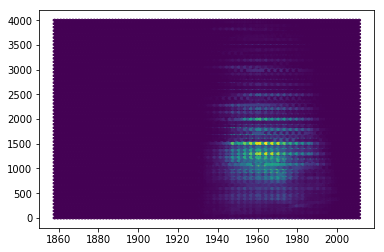

In [44]:
plt.hexbin(df["NAIA"][df["SALMEE"]<4000], df["SALMEE"][df["SALMEE"]<4000])

In [45]:
plt.show()

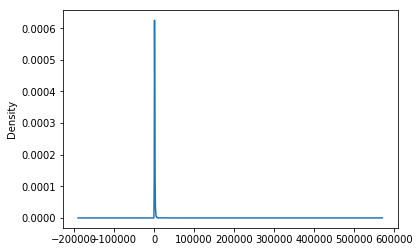

In [46]:
df["SALMEE"].plot.kde()

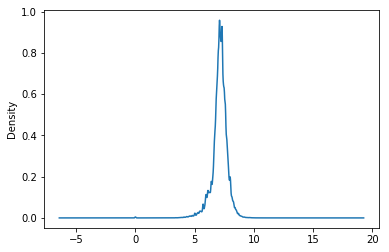

In [47]:
np.log(df.loc[df["SALMEE"]>0,"SALMEE"]).plot.kde()

In [48]:
plt.show()

In [49]:
df.describe()

,NAIA,SALMEE
count,1.231146e+06,1.231146e+06
mean,1.964246e+03,1.489134e+03
std,1.247834e+01,1.488566e+03
min,1.858000e+03,0.000000e+00
25%,1.955000e+03,9.450000e+02
50%,1.964000e+03,1.298000e+03
75%,1.973000e+03,1.799000e+03
max,2.011000e+03,3.800480e+05


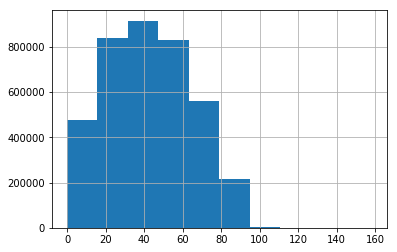

In [50]:
data["AGE"].hist()
plt.show()

In [51]:
df = data.loc[(data["SEXE"]=="2")&(data["AGE"]<66),["SALMEE", "ANNEE", "AGE", "NAIA"]].dropna().astype("float").groupby(["ANNEE","AGE"]).median()

In [52]:
df.head()

SALMEE    NAIA
ANNEE  AGE                 
1993.0 16.0   183.0  1977.0
       17.0   218.0  1976.0
       18.0   305.0  1975.0
       19.0   398.5  1974.0
       20.0   430.0  1973.0

In [53]:
df = pd.pivot_table(df, values='SALMEE', index=['AGE'], columns=['NAIA'])

In [54]:
df.head()

NAIA,1928.0,1929.0,1930.0,1931.0,1932.0,1933.0,1934.0,1935.0,1936.0,1937.0,...,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0
AGE,,,,,,,,,,,,,,,,,,,,,
15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,345.0,334.0,338.5,347.5,313.5,357.0,367.0,357.0,350.0,365.0
16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,350.0,350.0,352.0,362.5,373.0,361.5,364.0,357.0,370.0,NaN
17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,387.0,361.0,358.0,392.0,370.0,500.0,420.0,470.0,NaN,NaN
18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,527.0,516.0,550.0,617.5,577.0,601.0,600.0,NaN,NaN,NaN
19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,700.0,700.0,700.0,784.5,715.0,790.0,NaN,NaN,NaN,NaN


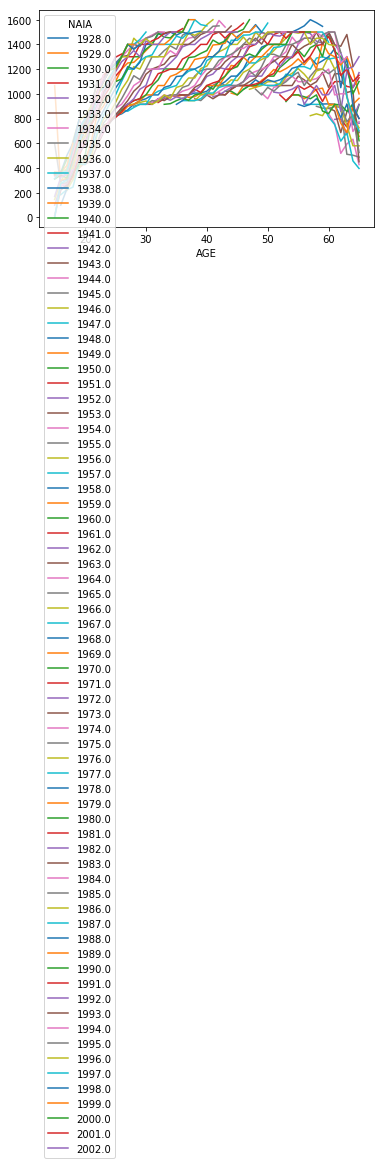

In [55]:
df.plot()
plt.show()

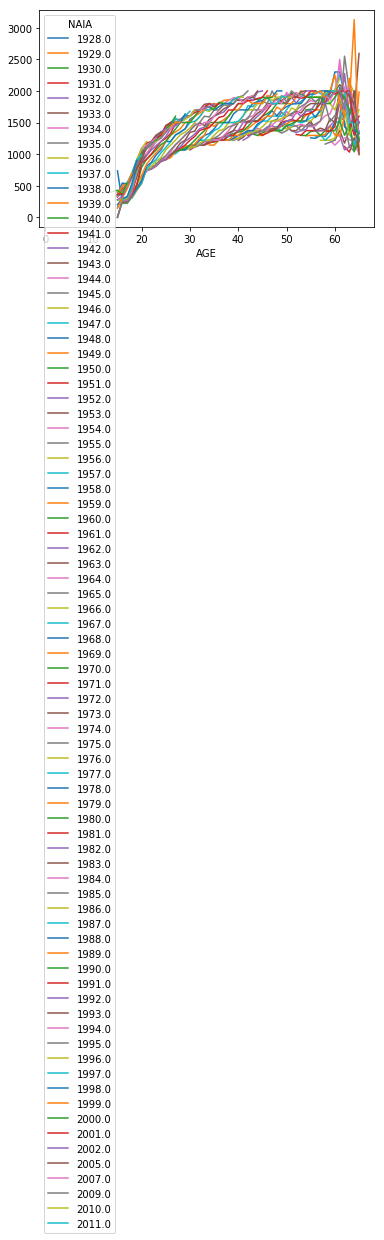

In [56]:
df = data.loc[(data["SEXE"]=="1")&(data["AGE"]<66),["SALMEE", "ANNEE", "AGE", "NAIA"]].dropna().astype("float").groupby(["ANNEE","AGE"]).median()
df = pd.pivot_table(df, values='SALMEE', index=['AGE'], columns=['NAIA'])
df.plot()
plt.show()

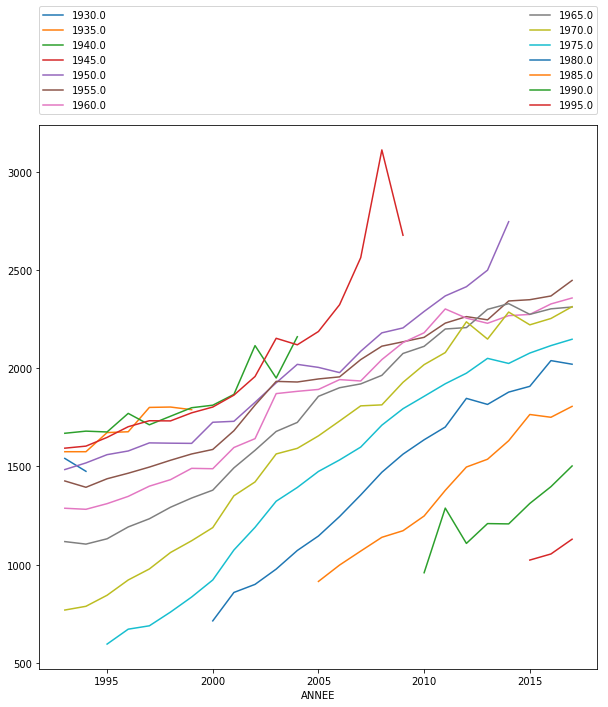

In [57]:
df = data.loc[(data["SEXE"]=="1")&(data["AGE"]<61)&(data["AGE"]>19),["SALMEE", "ANNEE", "AGEQ", "NAIAQ"]].dropna().astype("float").groupby(["ANNEE","AGEQ"]).mean()
df = pd.pivot_table(df, values='SALMEE', index=['ANNEE'], columns=['NAIAQ'])
df.plot(figsize=(10,10))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


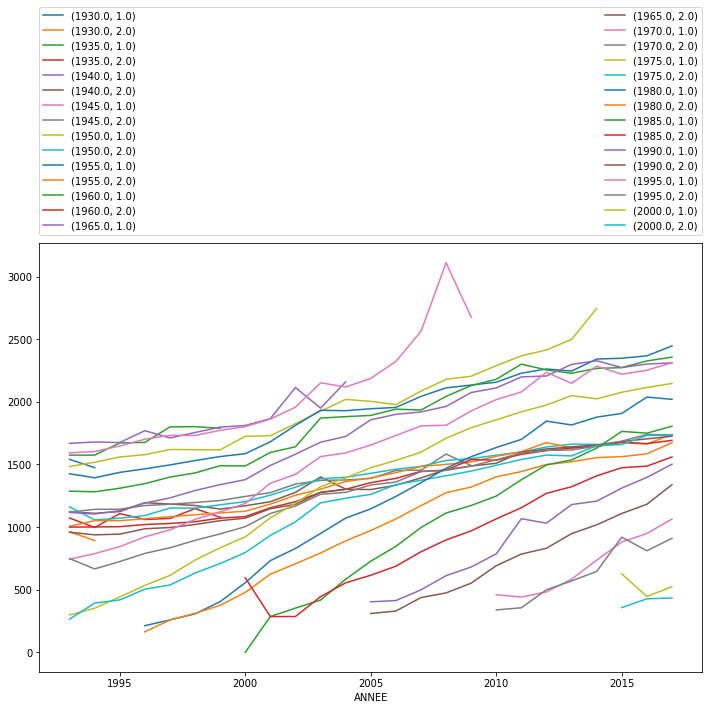

In [58]:
plt.rcParams.update({'figure.autolayout': True})
df = data.loc[(data["AGE"].astype("float")<61)&(data["AGE"].astype("float")>14),["SALMEE", "ANNEE", "AGEQ", "NAIAQ", "SEXE"]].dropna().astype("float").groupby(["ANNEE","AGEQ","SEXE"]).mean()
#    (data["ANNEE"].dropna().astype("float")>2012)
df = pd.pivot_table(df, values='SALMEE', index=['ANNEE'], columns=['NAIAQ', 'SEXE'])
df.plot(figsize=(10,10))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


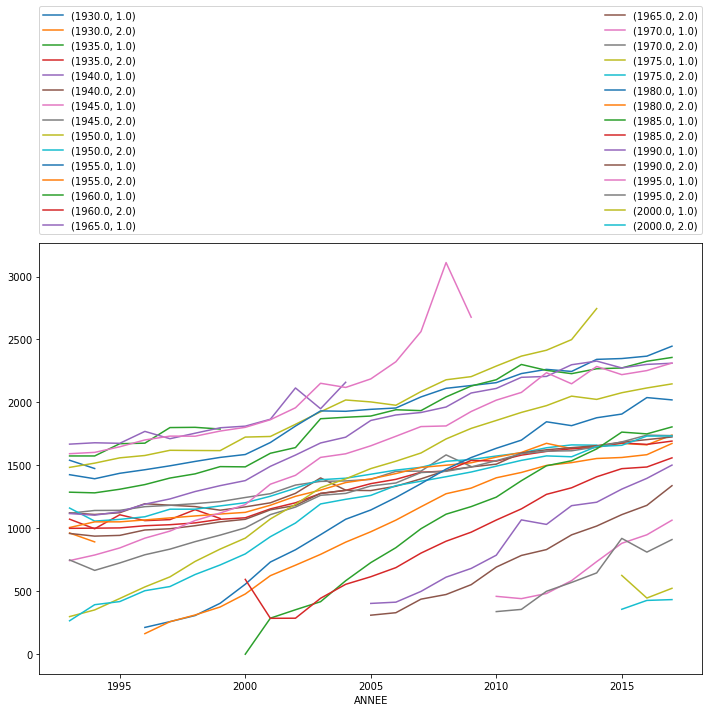

In [59]:
df.plot(figsize=(10,10))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


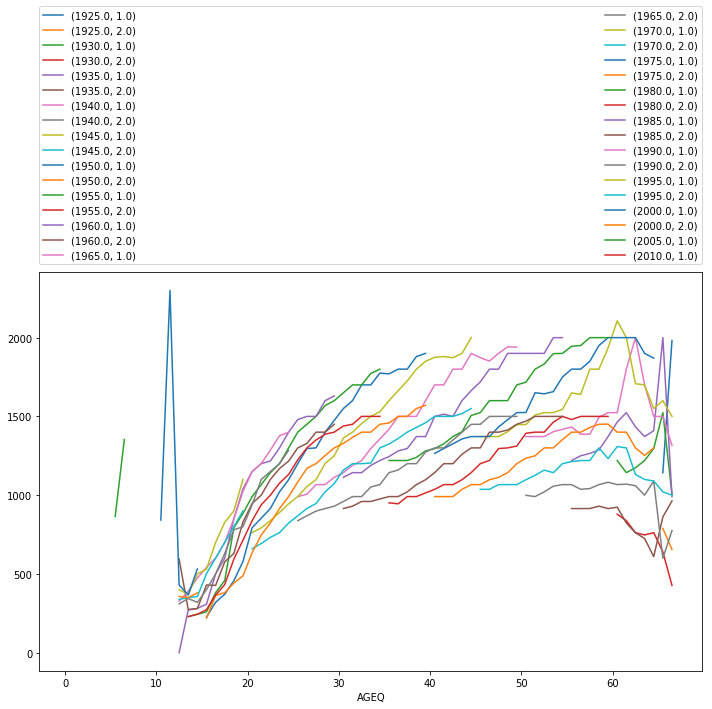

In [60]:
df = data.loc[(data["AGE"]<66),["SALMEE", "ANNEE", "AGEQ", "NAIAQ", "SEXE"]].dropna().astype("float").groupby(["ANNEE","AGEQ", "SEXE"]).median()
df = pd.pivot_table(df, values='SALMEE', index=['AGEQ'], columns=['NAIAQ', "SEXE"])
df.plot(figsize=(10,10))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


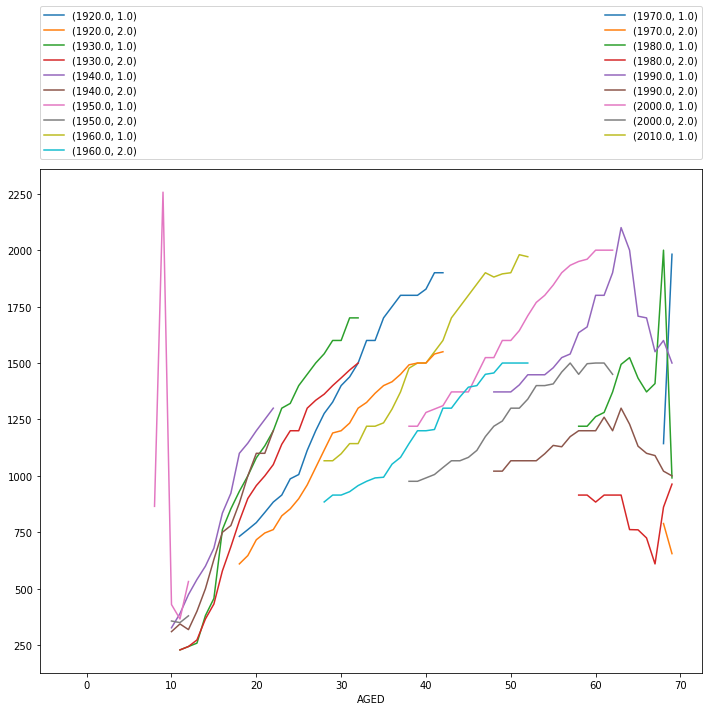

In [61]:
df = data.loc[(data["AGE"]<66),["SALMEE", "ANNEE", "AGED", "NAIAD", "SEXE"]].dropna().astype("float").groupby(["ANNEE","AGED", "SEXE"]).median()
df = pd.pivot_table(df, values='SALMEE', index=['AGED'], columns=['NAIAD', "SEXE"])
df.plot(figsize=(10,10))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


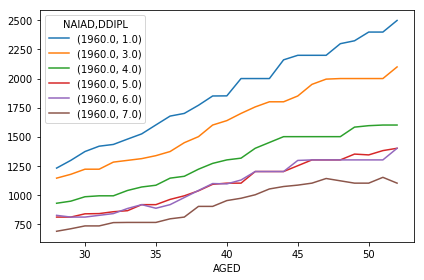

In [62]:
df = data.loc[(data["NAIAD"]==1960)&(data["SEXE"]=="2")&(data["AGE"]<66),["SALMEE", "ANNEE", "AGED", "NAIAD", "DDIPL"]].dropna().astype("float").groupby(["ANNEE","AGED", "DDIPL"]).median()
df = pd.pivot_table(df, values='SALMEE', index=['AGED'], columns=['NAIAD', "DDIPL"])
df.plot()
plt.show()

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


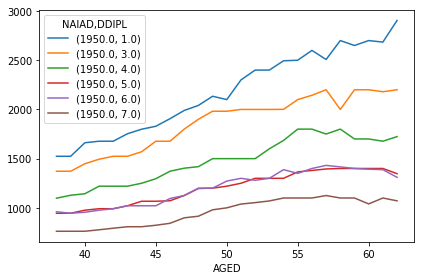

In [63]:
df = data.loc[(data["NAIAD"]==1950)&(data["SEXE"]=="2")&(data["AGE"]<66),["SALMEE", "ANNEE", "AGED", "NAIAD", "DDIPL"]].dropna().astype("float").groupby(["ANNEE","AGED", "DDIPL"]).median()
df = pd.pivot_table(df, values='SALMEE', index=['AGED'], columns=['NAIAD', "DDIPL"])
df.plot()
plt.show()

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


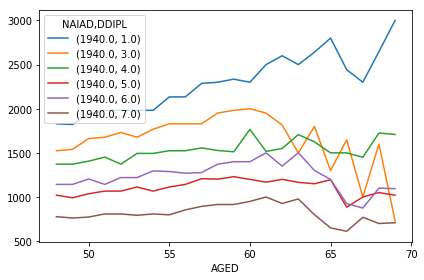

In [64]:
df = data.loc[(data["NAIAD"]==1940)&(data["SEXE"]=="2")&(data["AGE"]<66),["SALMEE", "ANNEE", "AGED", "NAIAD", "DDIPL"]].dropna().astype("float").groupby(["ANNEE","AGED", "DDIPL"]).median()
df = pd.pivot_table(df, values='SALMEE', index=['AGED'], columns=['NAIAD', "DDIPL"])
df.plot()
plt.show()

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


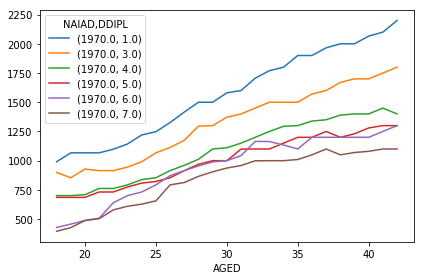

In [65]:
df = data.loc[(data["NAIAD"]==1970)&(data["SEXE"]=="2")&(data["AGE"]<66),["SALMEE", "ANNEE", "AGED", "NAIAD", "DDIPL"]].dropna().astype("float").groupby(["ANNEE","AGED", "DDIPL"]).median()
df = pd.pivot_table(df, values='SALMEE', index=['AGED'], columns=['NAIAD', "DDIPL"])
df.plot()
plt.show()

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


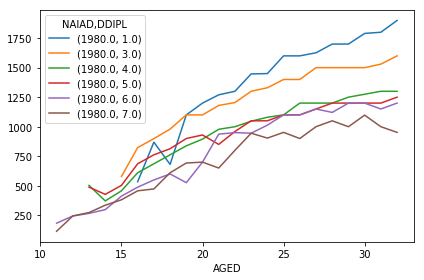

In [66]:
df = data.loc[(data["NAIAD"]==1980)&(data["SEXE"]=="2")&(data["AGE"]<66),["SALMEE", "ANNEE", "AGED", "NAIAD", "DDIPL"]].dropna().astype("float").groupby(["ANNEE","AGED", "DDIPL"]).median()
df = pd.pivot_table(df, values='SALMEE', index=['AGED'], columns=['NAIAD', "DDIPL"])
df.plot()
plt.show()

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


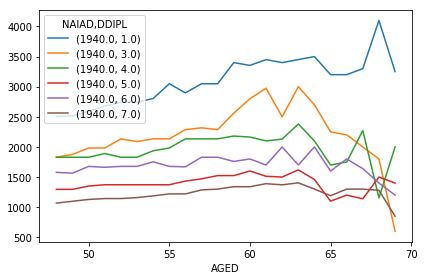

In [67]:
df = data.loc[(data["NAIAD"]==1940)&(data["SEXE"]=="1")&(data["AGE"]<66),["SALMEE", "ANNEE", "AGED", "NAIAD", "DDIPL"]].dropna().astype("float").groupby(["ANNEE","AGED", "DDIPL"]).median()
df = pd.pivot_table(df, values='SALMEE', index=['AGED'], columns=['NAIAD', "DDIPL"])
df.plot()
plt.show()

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


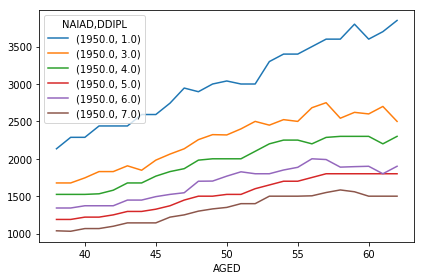

In [68]:
df = data.loc[(data["NAIAD"]==1950)&(data["SEXE"]=="1")&(data["AGE"]<66),["SALMEE", "ANNEE", "AGED", "NAIAD", "DDIPL"]].dropna().astype("float").groupby(["ANNEE","AGED", "DDIPL"]).median()
df = pd.pivot_table(df, values='SALMEE', index=['AGED'], columns=['NAIAD', "DDIPL"])
df.plot()
plt.show()

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


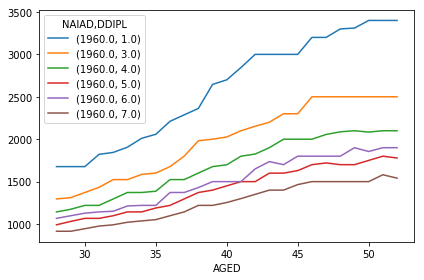

In [69]:
df = data.loc[(data["NAIAD"]==1960)&(data["SEXE"]=="1")&(data["AGE"]<66),["SALMEE", "ANNEE", "AGED", "NAIAD", "DDIPL"]].dropna().astype("float").groupby(["ANNEE","AGED", "DDIPL"]).median()
df = pd.pivot_table(df, values='SALMEE', index=['AGED'], columns=['NAIAD', "DDIPL"])
df.plot()
plt.show()

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


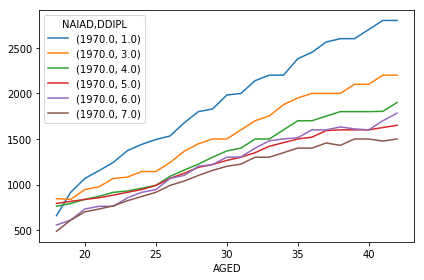

In [70]:
df = data.loc[(data["NAIAD"]==1970)&(data["SEXE"]=="1")&(data["AGE"]<66),["SALMEE", "ANNEE", "AGED", "NAIAD", "DDIPL"]].dropna().astype("float").groupby(["ANNEE","AGED", "DDIPL"]).median()
df = pd.pivot_table(df, values='SALMEE', index=['AGED'], columns=['NAIAD', "DDIPL"])
df.plot()
plt.show()

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


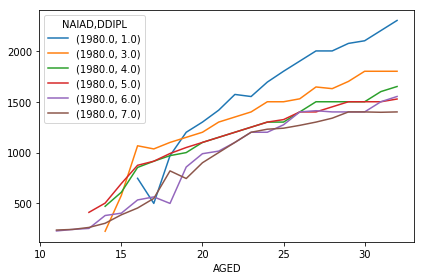

In [71]:
df = data.loc[(data["NAIAD"]==1980)&(data["SEXE"]=="1")&(data["AGE"]<66),["SALMEE", "ANNEE", "AGED", "NAIAD", "DDIPL"]].dropna().astype("float").groupby(["ANNEE","AGED", "DDIPL"]).median()
df = pd.pivot_table(df, values='SALMEE', index=['AGED'], columns=['NAIAD', "DDIPL"])
df.plot()
plt.show()


** Premiers essais de réseaux de neurones **


In [72]:
rndata = data.loc[:,["NAIA","ANNEE","SEXE","HHC","SALMEE", "ACTEU", "DATANT", "DDIPL"]].dropna().astype("float")

In [73]:
len(rndata.iloc[:,0])

1142211

In [74]:
rndata.head()

,NAIA,ANNEE,SEXE,HHC,SALMEE,ACTEU,DATANT,DDIPL
0,1939.0,1993.0,1.0,39.0,854.0,1.0,1986.0,7.0
1,1951.0,1993.0,2.0,4.0,34.0,1.0,1989.0,7.0
5,1954.0,1993.0,1.0,39.0,1235.0,1.0,1989.0,7.0
6,1953.0,1993.0,2.0,39.0,1306.0,1.0,1974.0,4.0
7,1932.0,1993.0,1.0,60.0,0.0,1.0,1959.0,7.0


In [284]:
Y = rndata.loc[:,"SALMEE"].values
X = rndata.loc[:,["NAIA","ANNEE","SEXE","HHC", "ACTEU", "DATANT", "DDIPL"]].values

y_train = rndata.loc[data["NAIM"]=="03","SALMEE"].values
x_train = rndata.loc[data["NAIM"]=="03",["NAIA","ANNEE","SEXE","HHC", "ACTEU", "DATANT", "DDIPL"]].values

y_test = rndata.loc[data["NAIM"]=="04","SALMEE"].values
x_test = rndata.loc[data["NAIM"]=="04",["NAIA","ANNEE","SEXE","HHC", "ACTEU", "DATANT", "DDIPL"]].values

In [136]:
x_train

array([[  1.94300000e+03,   1.99300000e+03,   2.00000000e+00, ...,
          1.00000000e+00,   1.96600000e+03,   6.00000000e+00],
       [  1.93000000e+03,   1.99300000e+03,   2.00000000e+00, ...,
          1.00000000e+00,   1.97000000e+03,   7.00000000e+00],
       [  1.96400000e+03,   1.99300000e+03,   2.00000000e+00, ...,
          1.00000000e+00,   1.98200000e+03,   6.00000000e+00],
       ..., 
       [  1.96600000e+03,   2.01700000e+03,   1.00000000e+00, ...,
          1.00000000e+00,   1.99100000e+03,   7.00000000e+00],
       [  1.99400000e+03,   2.01700000e+03,   1.00000000e+00, ...,
          1.00000000e+00,   2.01300000e+03,   4.00000000e+00],
       [  1.96800000e+03,   2.01700000e+03,   1.00000000e+00, ...,
          1.00000000e+00,   2.00400000e+03,   4.00000000e+00]])

In [80]:
from keras.layers import Input, Dense
from keras.models import Model

# This returns a tensor
inputs = Input(shape=(7,))

# a layer instance is callable on a tensor, and returns a tensor
# x = Dense(32, activation='selu', kernel_initializer="lecun_uniform", bias_initializer='lecun_uniform')(inputs)
x = Dense(32, activation='relu')(inputs)
# x = keras.layers.AlphaDropout(0.2)(x)
# x = Dense(8, activation='selu', kernel_initializer="lecun_uniform", bias_initializer='lecun_uniform')(x)
# x = keras.layers.AlphaDropout(0.2)(x)
predictions = Dense(1, activation='linear')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='mean_squared_error')

model.fit(x_train, y_train, epochs=1000, batch_size=20, shuffle=True)  # starts training

Epoch 1/1000
98900/98900 [==============================] - 6s 60us/step - loss: 2236026.3381
Epoch 2/1000
98900/98900 [==============================] - 6s 62us/step - loss: 2196111.7353
Epoch 3/1000
98900/98900 [==============================] - 6s 62us/step - loss: 2114621.8412
Epoch 4/1000
98900/98900 [==============================] - 7s 66us/step - loss: 2035199.4062
Epoch 5/1000
98900/98900 [==============================] - 6s 62us/step - loss: 1995103.4452
Epoch 6/1000
98900/98900 [==============================] - 6s 65us/step - loss: 1975805.3195
Epoch 7/1000
98900/98900 [==============================] - 6s 64us/step - loss: 1963152.6001
Epoch 8/1000
98900/98900 [==============================] - 6s 65us/step - loss: 1954389.5730
Epoch 9/1000
98900/98900 [==============================] - 6s 65us/step - loss: 1944096.2924
Epoch 10/1000
98900/98900 [==============================] - 6s 65us/step - loss: 1942043.6462
Epoch 11/1000
98900/98900 [==============================] 

98900/98900 [==============================] - 6s 59us/step - loss: 1858813.1751
Epoch 88/1000
98900/98900 [==============================] - 6s 61us/step - loss: 1859343.0241
Epoch 89/1000
98900/98900 [==============================] - 6s 64us/step - loss: 1860532.8136
Epoch 90/1000
98900/98900 [==============================] - 6s 60us/step - loss: 1858143.4270
Epoch 91/1000
98900/98900 [==============================] - 6s 65us/step - loss: 1859746.0593
Epoch 92/1000
98900/98900 [==============================] - 6s 60us/step - loss: 1858061.9596
Epoch 93/1000
98900/98900 [==============================] - 6s 58us/step - loss: 1855086.2047
Epoch 94/1000
98900/98900 [==============================] - 6s 59us/step - loss: 1857251.4091
Epoch 95/1000
98900/98900 [==============================] - 6s 64us/step - loss: 1854527.2553
Epoch 96/1000
98900/98900 [==============================] - 6s 60us/step - loss: 1855414.2809
Epoch 97/1000
98900/98900 [==============================] - 6s 

98900/98900 [==============================] - 5s 55us/step - loss: 1836724.7736
Epoch 173/1000
98900/98900 [==============================] - 6s 60us/step - loss: 1834996.1404
Epoch 174/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1834438.1549
Epoch 175/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1833494.1415
Epoch 176/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1834015.3201
Epoch 177/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1833843.5317
Epoch 178/1000
98900/98900 [==============================] - 6s 60us/step - loss: 1832554.2831
Epoch 179/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1833919.0425
Epoch 180/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1833069.6936
Epoch 181/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1832845.3719
Epoch 182/1000
98900/98900 [===========================

98900/98900 [==============================] - 6s 57us/step - loss: 1828996.5467
Epoch 258/1000
98900/98900 [==============================] - 6s 60us/step - loss: 1830181.6249
Epoch 259/1000
98900/98900 [==============================] - 6s 57us/step - loss: 1828085.1906
Epoch 260/1000
98900/98900 [==============================] - 5s 55us/step - loss: 1829137.9838
Epoch 261/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1826694.5061
Epoch 262/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1828006.0568
Epoch 263/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1826527.9237
Epoch 264/1000
98900/98900 [==============================] - 6s 60us/step - loss: 1829565.8680
Epoch 265/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1828980.3525
Epoch 266/1000
98900/98900 [==============================] - 6s 57us/step - loss: 1827347.0825
Epoch 267/1000
98900/98900 [===========================

98900/98900 [==============================] - 6s 57us/step - loss: 1826980.2555
Epoch 343/1000
98900/98900 [==============================] - 5s 56us/step - loss: 1824814.5043
Epoch 344/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1826849.6846
Epoch 345/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1828454.8972
Epoch 346/1000
98900/98900 [==============================] - 5s 55us/step - loss: 1826264.5586
Epoch 347/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1826111.3934
Epoch 348/1000
98900/98900 [==============================] - 6s 57us/step - loss: 1827338.6603
Epoch 349/1000
98900/98900 [==============================] - 6s 59us/step - loss: 1827657.4590
Epoch 350/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1826167.5718
Epoch 351/1000
98900/98900 [==============================] - 6s 57us/step - loss: 1825979.5787
Epoch 352/1000
98900/98900 [===========================

98900/98900 [==============================] - 6s 56us/step - loss: 1821486.3948
Epoch 428/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1823232.3057
Epoch 429/1000
98900/98900 [==============================] - 6s 57us/step - loss: 1825253.5110
Epoch 430/1000
98900/98900 [==============================] - 5s 55us/step - loss: 1820772.1639
Epoch 431/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1822599.7589
Epoch 432/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1822433.1176
Epoch 433/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1823197.7336
Epoch 434/1000
98900/98900 [==============================] - 6s 58us/step - loss: 1823888.2520
Epoch 435/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1822246.1693
Epoch 436/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1823302.2207
Epoch 437/1000
98900/98900 [===========================

98900/98900 [==============================] - 6s 57us/step - loss: 1822970.1978
Epoch 513/1000
98900/98900 [==============================] - 6s 61us/step - loss: 1821476.9215
Epoch 514/1000
98900/98900 [==============================] - 5s 55us/step - loss: 1819685.9864
Epoch 515/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1820873.3727
Epoch 516/1000
98900/98900 [==============================] - 6s 63us/step - loss: 1818408.0326
Epoch 517/1000
98900/98900 [==============================] - 7s 67us/step - loss: 1822376.9540
Epoch 518/1000
98900/98900 [==============================] - 5s 55us/step - loss: 1822611.2732
Epoch 519/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1819850.4632
Epoch 520/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1821576.6036
Epoch 521/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1821288.0540
Epoch 522/1000
98900/98900 [===========================

98900/98900 [==============================] - 5s 55us/step - loss: 1818292.8359
Epoch 597/1000
98900/98900 [==============================] - 5s 55us/step - loss: 1820639.1356
Epoch 598/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1819898.1653
Epoch 599/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1820773.0884
Epoch 600/1000
98900/98900 [==============================] - 5s 56us/step - loss: 1819866.6644
Epoch 601/1000
98900/98900 [==============================] - 5s 55us/step - loss: 1818140.4423
Epoch 602/1000
98900/98900 [==============================] - 6s 57us/step - loss: 1821433.8857
Epoch 603/1000
98900/98900 [==============================] - 6s 60us/step - loss: 1819833.4016
Epoch 604/1000
98900/98900 [==============================] - 5s 55us/step - loss: 1819625.0942
Epoch 605/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1819059.0637
Epoch 606/1000
98900/98900 [===========================

98900/98900 [==============================] - 6s 57us/step - loss: 1818479.8135
Epoch 682/1000
98900/98900 [==============================] - 5s 54us/step - loss: 1819697.6808
Epoch 683/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1821072.5958
Epoch 684/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1818494.1261
Epoch 685/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1819379.9673
Epoch 686/1000
98900/98900 [==============================] - 5s 55us/step - loss: 1816808.2262
Epoch 687/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1818738.5637
Epoch 688/1000
98900/98900 [==============================] - 6s 59us/step - loss: 1818710.0299
Epoch 689/1000
98900/98900 [==============================] - 5s 55us/step - loss: 1819328.5568
Epoch 690/1000
98900/98900 [==============================] - 5s 56us/step - loss: 1818593.9835
Epoch 691/1000
98900/98900 [===========================

98900/98900 [==============================] - 6s 57us/step - loss: 1818809.8452
Epoch 767/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1817764.0354
Epoch 768/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1818131.7796
Epoch 769/1000
98900/98900 [==============================] - 5s 55us/step - loss: 1817484.3067
Epoch 770/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1817171.1118
Epoch 771/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1816658.1907
Epoch 772/1000
98900/98900 [==============================] - 5s 55us/step - loss: 1819293.7046
Epoch 773/1000
98900/98900 [==============================] - 6s 57us/step - loss: 1817936.7351
Epoch 774/1000
98900/98900 [==============================] - 6s 59us/step - loss: 1818149.9426
Epoch 775/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1818516.6537
Epoch 776/1000
98900/98900 [===========================

98900/98900 [==============================] - 6s 56us/step - loss: 1815955.8285
Epoch 852/1000
98900/98900 [==============================] - 5s 54us/step - loss: 1816850.1326
Epoch 853/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1818395.3598
Epoch 854/1000
98900/98900 [==============================] - 6s 57us/step - loss: 1816686.9389
Epoch 855/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1817361.0597
Epoch 856/1000
98900/98900 [==============================] - 5s 55us/step - loss: 1815847.4505
Epoch 857/1000
98900/98900 [==============================] - 6s 57us/step - loss: 1816121.3213
Epoch 858/1000
98900/98900 [==============================] - 6s 57us/step - loss: 1817782.3884
Epoch 859/1000
98900/98900 [==============================] - 5s 56us/step - loss: 1815800.5829
Epoch 860/1000
98900/98900 [==============================] - 6s 59us/step - loss: 1817448.2153
Epoch 861/1000
98900/98900 [===========================

98900/98900 [==============================] - 5s 55us/step - loss: 1815348.6115
Epoch 937/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1817187.5498
Epoch 938/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1814434.3010
Epoch 939/1000
98900/98900 [==============================] - 5s 55us/step - loss: 1814701.6616
Epoch 940/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1815164.4215
Epoch 941/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1815784.8037
Epoch 942/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1817569.3947
Epoch 943/1000
98900/98900 [==============================] - 6s 57us/step - loss: 1814366.0946
Epoch 944/1000
98900/98900 [==============================] - 6s 56us/step - loss: 1817321.6843
Epoch 945/1000
98900/98900 [==============================] - 6s 59us/step - loss: 1815661.2532
Epoch 946/1000
98900/98900 [===========================

In [101]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=1)

97813/97813 [==============================] - 59s 606us/step


In [82]:
loss_and_metrics

1521835.9839486443

In [102]:
loss_and_metrics

1521835.9854316132

In [135]:
pred = model.predict(x_train)

ValueError: shapes (98900,7) and (8,) not aligned: 7 (dim 1) != 8 (dim 0)

In [138]:
x_train[0,:].shape

(7,)

In [85]:
pred.shape

(98900, 1)

In [86]:
pred

array([[ 1150.75292969],
       [ 1505.65185547],
       [  980.48815918],
       ..., 
       [ 1355.75878906],
       [ 1273.85021973],
       [ 1797.75585938]], dtype=float32)

In [87]:
y_test

array([  762.,   915.,  1021., ...,  2000.,  1139.,  1961.])

In [88]:
pred_df = pd.DataFrame(x_train, columns=["NAIA","ANNEE","SEXE","HHC", "ACTEU", "DATANT", "DDIPL"])
pred_df["SALMEE_PRED"] = pred
pred_df["SALMEE"] = y_train
pred_df["AGE"]=pred_df["ANNEE"]-pred_df["NAIA"]

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


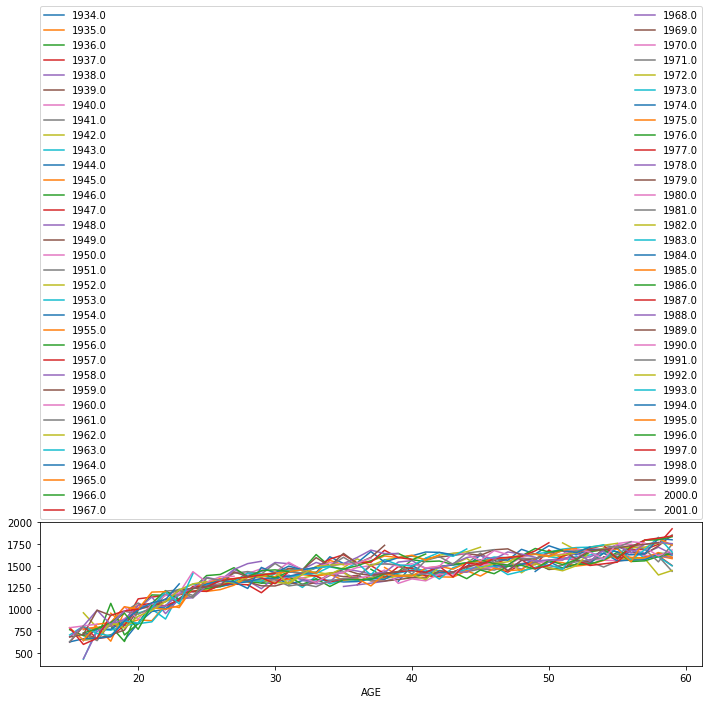

In [90]:
# x_train = rndata.loc[data["NAIM"]=="03",["NAIA","ANNEE","SEXE","HHC", "ACTEU", "DATANT", "DDIPL"]].values
df = pred_df.loc[pred_df["AGE"]<60,["SALMEE_PRED", "ANNEE", "NAIA", "AGE"]].dropna().astype("float").groupby(["ANNEE","AGE"]).median()
df = pd.pivot_table(df, values='SALMEE_PRED', index=['AGE'], columns=['NAIA'])
df.plot(figsize=(10,10))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


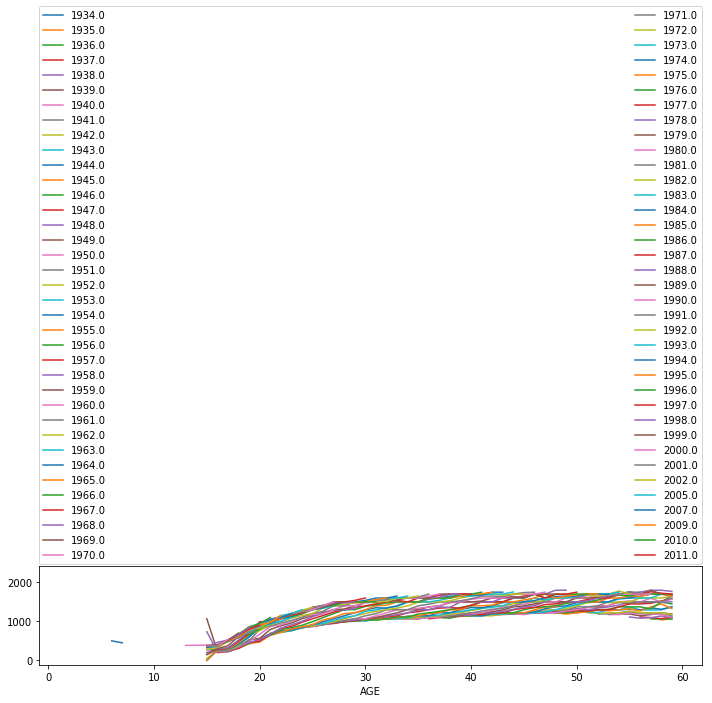

In [96]:
df = data.loc[data["AGE"]<60,["SALMEE", "ANNEE", "NAIA", "AGE"]].dropna().astype("float").groupby(["ANNEE","AGE"]).median()
df = pd.pivot_table(df, values='SALMEE', index=['AGE'], columns=['NAIA'])
df.plot(figsize=(10,10))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


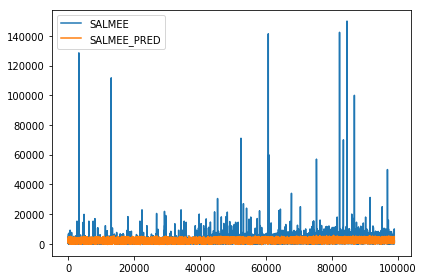

In [98]:
df = pred_df.loc[:,["SALMEE","SALMEE_PRED"]]
df.plot()
plt.show()

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


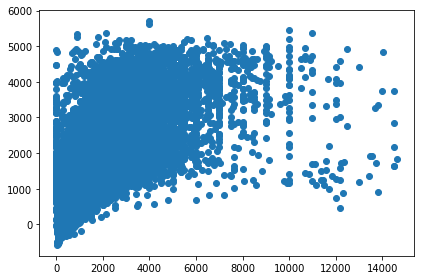

In [100]:
plt.scatter(df.loc[df["SALMEE"]<15000,"SALMEE"], df.loc[df["SALMEE"]<15000,"SALMEE_PRED"])

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


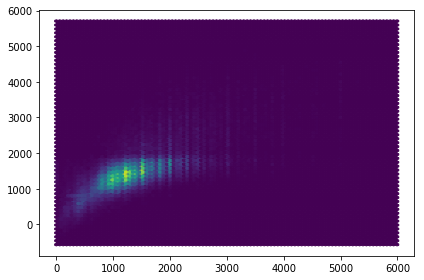

In [94]:
plt.hexbin(df.loc[df["SALMEE"]<6000,"SALMEE"], df.loc[df["SALMEE"]<6000,"SALMEE_PRED"])

In [99]:
df["SALMEE"].corr(df["SALMEE_PRED"])

0.44222077719577152

In [110]:
varsal = df["SALMEE"].var()
varpred = (df["SALMEE"]-df["SALMEE_PRED"]).var()
R2 = 1 - (varpred/varsal)
print(R2)

0.19512606212694528


In [113]:
np.sqrt(R2)

0.44173075750613661

On compare avec un modèle linéaire de base calculé sur les mêmes variables

In [105]:
# code piqué sur https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

import statsmodels.api as sm # import statsmodels 

X = x_train ## X usually means our input variables (or independent variables)
y = np.log(y_train+1) ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     9679.
Date:                Wed, 20 Jun 2018   Prob (F-statistic):               0.00
Time:                        15:35:15   Log-Likelihood:                -80314.
No. Observations:               98900   AIC:                         1.606e+05
Df Residuals:                   98892   BIC:                         1.607e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.4040      0.498    -55.052      0.000     -28.380     -26.428
x1            -0.0128      0.000    -76.997      0.000      -0.013      -0.013
x2             0.0308      0.000    110.768      0.000       0.030       0.031
x3            -0.1745      0.004    -48.079      0.000      -0.182      -0.167
x4             0.0303      0.000    159.817      0.000       0.030       0.031
x5            -0.1808      0.025     -7.296      0.000      -0.229      -0.132
x6            -0.0011   6.97e-05    -15.883      0.000      -0.001      -0.001
x7            -0.1182      0.001   -123.846      0.000      -0.120      -0.116
==============================================================================
Omnibus:                   116404.041   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         23717402.808
Skew:                          -6.057   Prob(JB):                         0.00
Kurtosis:                      77.891   Cond. No.                     9.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Le modèle linéaire est plus efficace (R2 de 0.4 contre une corrélation de 0.44 pour le RN. PS: je suis pas du tout sûr que la corrélation soit la bonne métrique ici !). Et, évidemment, il est rapide et interprétable. Mais c'est le cas seulement quand il est fité sur le log-salaire, ce que je n'ai pas fait pour le RN. Peut-être faut-il essayer ?

In [285]:
ylog_train = np.log(y_train+1)
ylog_test = np.log(y_test+1)

In [286]:
y_train

array([  762.,   915.,  1021., ...,  2000.,  1139.,  1961.])

In [287]:
ylog_train

array([ 6.63725803,  6.82001636,  6.92951677, ...,  7.60140233,
        7.03878354,  7.58171964])

In [560]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [648]:
# This returns a tensor
inputs = Input(shape=(7,))
from keras import regularizers
# a layer instance is callable on a tensor, and returns a tensor
# x = Dense(32, activation='selu', kernel_initializer="lecun_uniform", bias_initializer='lecun_uniform')(inputs)
x = Dense(8, activation='relu')(inputs)
# x = keras.layers.AlphaDropout(0.4)(x)
x = Dense(4, activation='relu')(x)
# x = keras.layers.AlphaDropout(0.4)(x)
x = Dense(2, activation='relu')(x)
# x = Dense(8, activation='selu', kernel_initializer="lecun_uniform", bias_initializer='lecun_uniform')(x)
# x = keras.layers.AlphaDropout(0.4)(x)
predictions = Dense(1, activation='linear',kernel_regularizer=regularizers.l1(0.000001))(x)

# This creates a model that includes
# the Input layer and three Dense layers
model2= Model(inputs=inputs, outputs=predictions)
model2.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse', 'mae'])

history = model2.fit(x_train_scaled, ylog_train, epochs=20, batch_size=500, shuffle=True)  # starts training

Epoch 1/20
98900/98900 [==============================] - 2s 24us/step - loss: 43.9671 - mean_squared_error: 43.9671 - mean_absolute_error: 6.5548
Epoch 2/20
98900/98900 [==============================] - 1s 6us/step - loss: 12.1381 - mean_squared_error: 12.1381 - mean_absolute_error: 2.9706
Epoch 3/20
98900/98900 [==============================] - 1s 7us/step - loss: 2.4303 - mean_squared_error: 2.4303 - mean_absolute_error: 1.2378
Epoch 4/20
98900/98900 [==============================] - 1s 6us/step - loss: 1.3489 - mean_squared_error: 1.3489 - mean_absolute_error: 0.9027
Epoch 5/20
98900/98900 [==============================] - 1s 7us/step - loss: 0.8324 - mean_squared_error: 0.8324 - mean_absolute_error: 0.6856
Epoch 6/20
98900/98900 [==============================] - 1s 7us/step - loss: 0.5633 - mean_squared_error: 0.5633 - mean_absolute_error: 0.5312
Epoch 7/20
98900/98900 [==============================] - 1s 6us/step - loss: 0.4330 - mean_squared_error: 0.4330 - mean_absolute_e

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


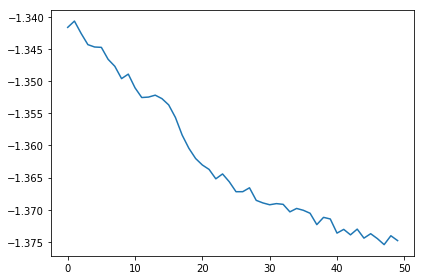

In [677]:
plt.plot(np.log(history.history['mean_squared_error']))

In [678]:
loss_and_metrics = model2.evaluate(x_test_scaled, ylog_test, batch_size=1000)

97813/97813 [==============================] - 0s 3us/step


In [679]:
loss_and_metrics

[0.25542837734281548, 0.25542716455971104, 0.25800257419704525]

In [676]:
history = model2.fit(x_train_scaled, ylog_train, epochs=50, batch_size=5, shuffle=True)

Epoch 1/50
98900/98900 [==============================] - 49s 500us/step - loss: 0.2614 - mean_squared_error: 0.2614 - mean_absolute_error: 0.2724
Epoch 2/50
98900/98900 [==============================] - 45s 455us/step - loss: 0.2617 - mean_squared_error: 0.2617 - mean_absolute_error: 0.2726
Epoch 3/50
98900/98900 [==============================] - 47s 473us/step - loss: 0.2612 - mean_squared_error: 0.2612 - mean_absolute_error: 0.2725
Epoch 4/50
98900/98900 [==============================] - 49s 491us/step - loss: 0.2607 - mean_squared_error: 0.2607 - mean_absolute_error: 0.2721
Epoch 5/50
98900/98900 [==============================] - 47s 471us/step - loss: 0.2606 - mean_squared_error: 0.2606 - mean_absolute_error: 0.2717
Epoch 6/50
98900/98900 [==============================] - 50s 501us/step - loss: 0.2606 - mean_squared_error: 0.2606 - mean_absolute_error: 0.2712
Epoch 7/50
98900/98900 [==============================] - 47s 477us/step - loss: 0.2601 - mean_squared_error: 0.2601 -

In [680]:
pred2 = model2.predict(x_test_scaled)
pred2_df = pd.DataFrame(x_test_scaled, columns=["NAIA","ANNEE","SEXE","HHC", "ACTEU", "DATANT", "DDIPL"])
pred2_df["SALMEE_PRED"] = pred2
pred2_df["SALMEE"] = ylog_test
pred2_df["AGE"]=pred2_df["ANNEE"]-pred2_df["NAIA"]
df = pred2_df.loc[:,["SALMEE","SALMEE_PRED"]]

In [681]:
varsal = df["SALMEE"].var()
varpred = (df["SALMEE"]-df["SALMEE_PRED"]).var()
R2 = 1 - (varpred/varsal)
print(R2)

0.4956967174921314


C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


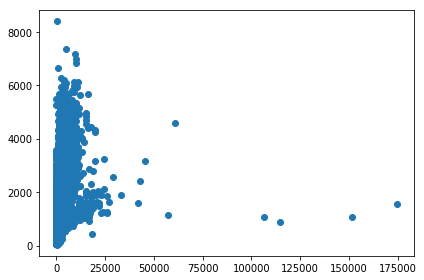

In [682]:
df = pred2_df.loc[:,["SALMEE","SALMEE_PRED"]]
plt.scatter(np.exp(df["SALMEE"]), np.exp(df["SALMEE_PRED"]))

C:\Users\TMYX43\Desktop\WinPython\python-3.6.5.amd64\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


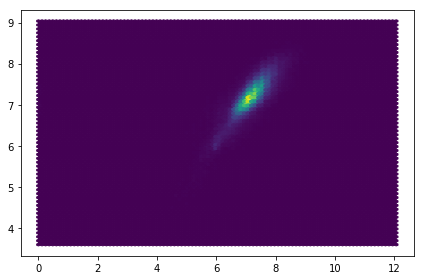

In [683]:
plt.hexbin(df["SALMEE"], df["SALMEE_PRED"])

In [684]:
varsal

0.5045376676421753

In [685]:
varpred

0.25444000194081307